In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import time
import re
import os
from google.colab import files

In [2]:
# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Keep original labels for display
y_test_original = y_test.copy()

# Convert to categorical for training
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

# Create the model as specified
cnn = models.Sequential([
    # Convert RGB to grayscale by taking the mean across channels
    layers.Lambda(lambda x: tf.reduce_mean(x, axis=-1, keepdims=True),
                 input_shape=(32, 32, 3)),

    # Minimal Conv layer
    layers.Conv2D(filters=4, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPool2D(pool_size=(2, 2)),

    # Second minimal Conv layer
    layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPool2D(pool_size=(2, 2)),

    # Flatten and classify
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

# Compile the model
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
history = cnn.fit(x_train, y_train_cat,
                  batch_size=64,
                  epochs=50,
                  validation_data=(x_test, y_test_cat),
                  verbose=1)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2584 - loss: 2.0446 - val_accuracy: 0.4077 - val_loss: 1.6864
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4218 - loss: 1.6515 - val_accuracy: 0.4595 - val_loss: 1.5586
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4645 - loss: 1.5402 - val_accuracy: 0.4792 - val_loss: 1.4962
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4874 - loss: 1.4815 - val_accuracy: 0.4928 - val_loss: 1.4537
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5022 - loss: 1.4398 - val_accuracy: 0.5064 - val_loss: 1.4196
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5140 - loss: 1.4074 - val_accuracy: 0.5146 - val_loss: 1.3953
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5237 - loss: 1.3801 - val_accuracy: 0.5217 - val_loss: 1.3747
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5315 - loss: 1.3562 - val_accuracy: 0.

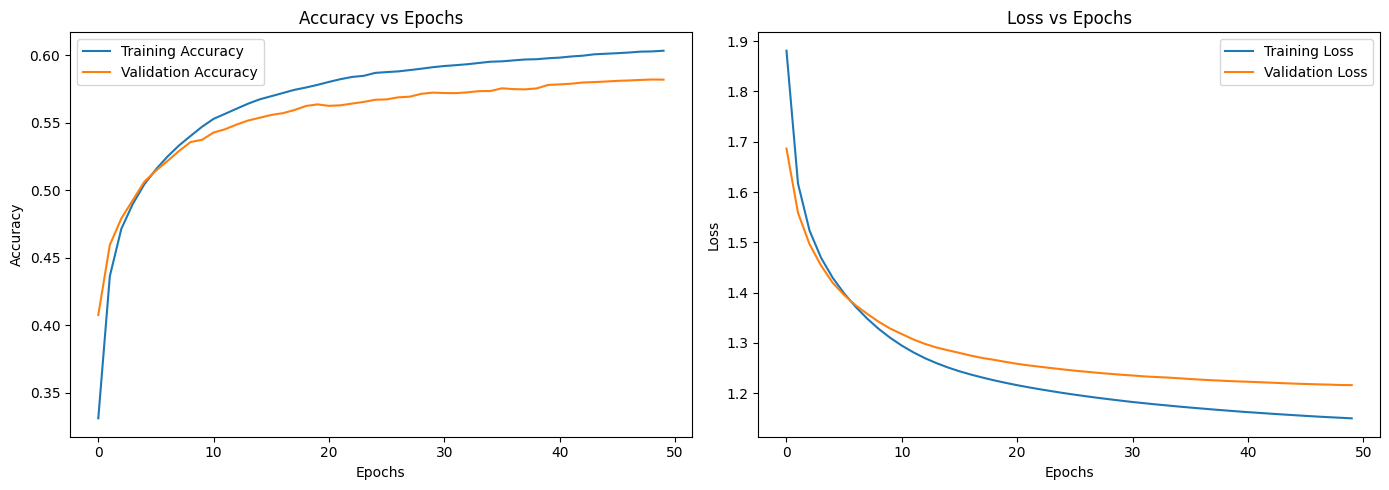

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Classification Report:
              precision    recall  f1-score   support

    airplane       0.58      0.64      0.61      1000
  automobile       0.71      0.70      0.70      1000
        bird       0.41      0.40      0.40      1000
         cat       0.42      0.34      0.38      1000
        deer       0.51      0.56      0.53      1000
         dog       0.51      0.54      0.52      1000
        frog       0.64      0.67      0.66      1000
       horse       0.64      0.68      0.66      1000
        ship       0.67      0.66      0.67      1000
       truck       0.71      0.63      0.67      1000

    accuracy                           0.58     10000
   macro avg       0.58      0.58      0.58     10000
weighted avg       0.58      0.58      0.58     10000



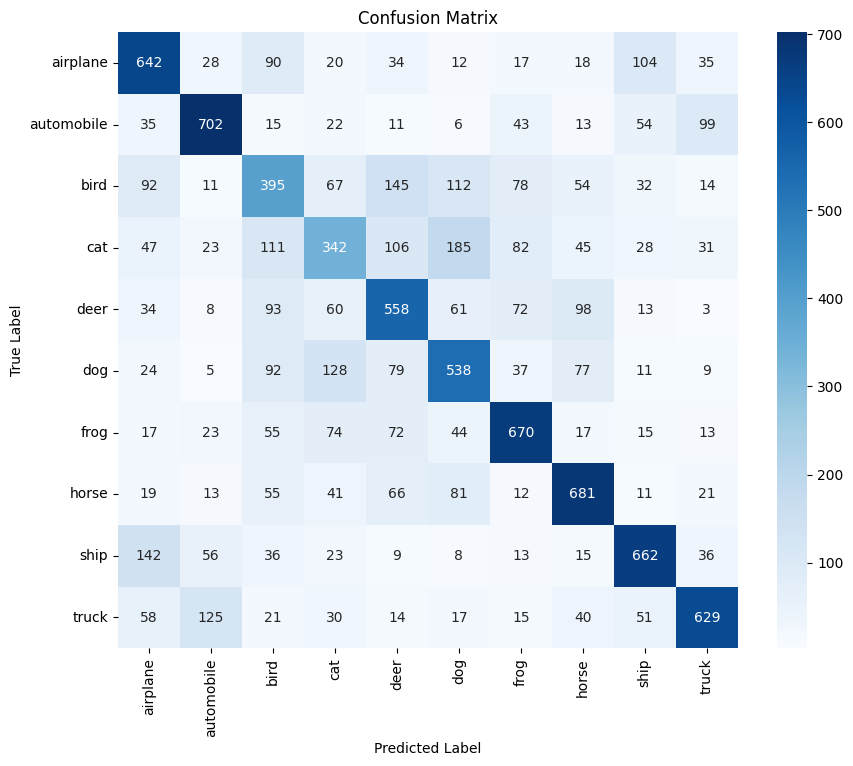


Model Evaluation:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5839 - loss: 1.2067
Test Loss: 1.2161
Test Accuracy: 0.5819


In [4]:
import pandas as pd
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix

# Plot training history
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Generate predictions
y_pred = cnn.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Use original labels for evaluation (not one-hot encoded)
y_true = y_test.squeeze()  # Remove singleton dimensions

# Classification report
print("\nClassification Report:")
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Evaluate with one-hot encoded test data
print("\nModel Evaluation:")
evaluation = cnn.evaluate(x_test, y_test_cat)
print(f"Test Loss: {evaluation[0]:.4f}")
print(f"Test Accuracy: {evaluation[1]:.4f}")

In [5]:
# Function to calculate average RGB values for an image
def get_avg_rgb(image):
    avg_r = np.mean(image[:, :, 0])
    avg_g = np.mean(image[:, :, 1])
    avg_b = np.mean(image[:, :, 2])
    return (int(avg_r * 255), int(avg_g * 255), int(avg_b * 255))

# Process first 1000 test images
num_images = 1000
correct_predictions = 0
total_inference_time = 0

for i in range(num_images):
    # Get the image and true label
    image = x_test[i:i+1]
    true_label = y_test_original[i][0]

    # Calculate average RGB
    avg_rgb = get_avg_rgb(x_test[i])

    # Measure inference time
    start_time = time.time()
    prediction = cnn.predict(image, verbose=0)
    end_time = time.time()
    inference_time = (end_time - start_time) * 1000  # Convert to milliseconds

    # Get predicted label and confidence
    pred_label = np.argmax(prediction[0])
    confidence = prediction[0][pred_label] * 100

    # Check if prediction is correct
    is_correct = (pred_label == true_label)
    if is_correct:
        correct_predictions += 1

    # Update total inference time
    total_inference_time += inference_time

    # Print result in the requested format
    print(f"Image #{i} (Batch 1): Label={true_label}, Avg RGB=({avg_rgb[0]},{avg_rgb[1]},{avg_rgb[2]})")
    print(f"The model predicts to be label {pred_label} with confidence {confidence:.2f}% and inference time {inference_time:.0f} ms")
    print("TRUE" if is_correct else "FALSE")

# Print summary statistics
accuracy = correct_predictions / num_images * 100
avg_inference_time = total_inference_time / num_images

print("\nFINISHED FIRST 1000 IMAGES!")
print(f"- Accruacy after running {num_images} first images: {accuracy:.2f}%")
print(f"- Average inference time after running {num_images} first images: {avg_inference_time:.0f} ms")
print(f"- Total inference time after running {num_images} first images: {(total_inference_time / 1000):.2f} (s)")

Image #0 (Batch 1): Label=3, Avg RGB=(110,110,104)
The model predicts to be label 6 with confidence 40.26% and inference time 347 ms
FALSE
Image #1 (Batch 1): Label=8, Avg RGB=(150,154,160)
The model predicts to be label 8 with confidence 96.58% and inference time 57 ms
TRUE
Image #2 (Batch 1): Label=8, Avg RGB=(121,133,143)
The model predicts to be label 8 with confidence 27.53% and inference time 65 ms
TRUE
Image #3 (Batch 1): Label=0, Avg RGB=(152,150,161)
The model predicts to be label 8 with confidence 83.29% and inference time 60 ms
FALSE
Image #4 (Batch 1): Label=6, Avg RGB=(107,122,92)
The model predicts to be label 6 with confidence 80.05% and inference time 63 ms
TRUE
Image #5 (Batch 1): Label=6, Avg RGB=(135,88,70)
The model predicts to be label 6 with confidence 67.69% and inference time 57 ms
TRUE
Image #6 (Batch 1): Label=1, Avg RGB=(106,62,58)
The model predicts to be label 1 with confidence 85.65% and inference time 56 ms
TRUE
Image #7 (Batch 1): Label=6, Avg RGB=(98,97

In [6]:
# Generate C code with parameters
def np_to_c_array(arr, indent=0, precision=8):
    indent_str = " " * indent

    if arr.ndim == 1:
        # For 1D arrays (biases)
        c_arr = "{"
        for i in range(arr.shape[0]):
            if i % 4 == 0 and i > 0:  # Format with 4 values per line
                c_arr += "\n" + indent_str + " "
            c_arr += f"{arr[i]:.{precision}f}f"
            if i < arr.shape[0] - 1:
                c_arr += ", "
        c_arr += "}"
        return c_arr

    elif arr.ndim == 4:
        # For 4D arrays (conv weights) - Reshape to [filters][channels][height][width]
        arr = np.transpose(arr, (3, 2, 0, 1))
        c_arr = "{"

        for f in range(arr.shape[0]):
            if f > 0:
                c_arr += ",\n" + indent_str + " "
            c_arr += "{ "

            for c in range(arr.shape[1]):
                if c > 0:
                    c_arr += ",\n" + indent_str + "  "
                c_arr += "{"

                for h in range(arr.shape[2]):
                    if h > 0:
                        c_arr += ",\n" + indent_str + "   "
                    c_arr += "{"

                    for w in range(arr.shape[3]):
                        c_arr += f"{arr[f, c, h, w]:.{precision}f}f"
                        if w < arr.shape[3] - 1:
                            c_arr += ", "

                    c_arr += "}"
                c_arr += "}"
            c_arr += "}"
        c_arr += "}"
        return c_arr

    elif arr.ndim == 2:
        # For 2D arrays (dense weights)
        c_arr = "{"
        for i in range(arr.shape[0]):
            if i > 0:
                c_arr += ",\n" + indent_str + " "
            c_arr += "{"
            for j in range(arr.shape[1]):
                if j % 10 == 0 and j > 0:  # Break into multiple lines for readability
                    c_arr += "\n" + indent_str + "  "
                c_arr += f"{arr[i, j]:.{precision}f}f"
                if j < arr.shape[1] - 1:
                    c_arr += ", "
            c_arr += "}"
        c_arr += "}"
        return c_arr

    else:
        return str(arr)

def generate_cnn_params_h(model):
    c_code = []
    c_code.append("/* CNN Parameter Values - Generated by TensorFlow */")
    c_code.append("#ifndef CNN_PARAMS_H")
    c_code.append("#define CNN_PARAMS_H")
    c_code.append("")

    # Extract parameters from each layer
    layer_idx = 0
    for i, layer in enumerate(model.layers):
        layer_name = layer.__class__.__name__

        if layer_name == 'Lambda':
            c_code.append(f"/* Layer {i}: Lambda (RGB to Grayscale) - No parameters */")
            c_code.append("")

        elif layer_name == 'Conv2D':
            weights, biases = layer.get_weights()

            # Layer dimensions
            out_channels = weights.shape[3]  # Number of filters
            in_channels = weights.shape[2]   # Input channels
            kernel_h = weights.shape[0]      # Kernel height
            kernel_w = weights.shape[1]      # Kernel width

            c_code.append(f"/* Layer {i}: Conv2D */")
            c_code.append(f"#define CONV{layer_idx}_OUT_CHANNELS {out_channels}")
            c_code.append(f"#define CONV{layer_idx}_IN_CHANNELS {in_channels}")
            c_code.append(f"#define CONV{layer_idx}_KERNEL_SIZE {kernel_h}")
            c_code.append("")

            # Weights
            c_code.append(f"/* Conv{layer_idx} weights [filters][channels][height][width] */")
            c_code.append(f"static const float conv{layer_idx}_weights[CONV{layer_idx}_OUT_CHANNELS][CONV{layer_idx}_IN_CHANNELS][CONV{layer_idx}_KERNEL_SIZE][CONV{layer_idx}_KERNEL_SIZE] = {np_to_c_array(weights, indent=0)};")
            c_code.append("")

            # Biases
            c_code.append(f"/* Conv{layer_idx} biases [filters] */")
            c_code.append(f"static const float conv{layer_idx}_biases[CONV{layer_idx}_OUT_CHANNELS] = {np_to_c_array(biases, indent=0)};")
            c_code.append("")

            layer_idx += 1

        elif layer_name == 'MaxPooling2D':
            pool_size = layer.get_config()['pool_size']
            c_code.append(f"/* Layer {i}: MaxPooling2D - Pool size: {pool_size} */")
            c_code.append(f"#define POOL{i-1}_SIZE {pool_size[0]}")
            c_code.append("")

        elif layer_name == 'Flatten':
            c_code.append(f"/* Layer {i}: Flatten - No parameters */")
            c_code.append("")

        elif layer_name == 'Dense':
            weights, biases = layer.get_weights()

            # Layer dimensions
            input_size = weights.shape[0]
            output_size = weights.shape[1]

            c_code.append(f"/* Layer {i}: Dense */")
            c_code.append(f"#define DENSE_INPUT_SIZE {input_size}")
            c_code.append(f"#define DENSE_OUTPUT_SIZE {output_size}")
            c_code.append("")

            # Weights
            c_code.append("/* Dense weights [input_size][output_size] */")
            c_code.append(f"static const float dense_weights[DENSE_INPUT_SIZE][DENSE_OUTPUT_SIZE] = {np_to_c_array(weights, indent=0)};")
            c_code.append("")

            # Biases
            c_code.append("/* Dense biases [output_size] */")
            c_code.append(f"static const float dense_biases[DENSE_OUTPUT_SIZE] = {np_to_c_array(biases, indent=0)};")
            c_code.append("")

    # Close the header guard
    c_code.append("#endif /* CNN_PARAMS_H */")

    return c_code

# After training the model, generate and save the C header file
c_code = generate_cnn_params_h(cnn)

# Write to file
with open('cnn_params.h', 'w') as f:
    f.write('\n'.join(c_code))

print("Generated C header file 'cnn_params.h' with parameter values")
print("\nPreview of generated C code:")
print("============================")
for line in c_code[:30]:  # Print first 30 lines as preview
    print(line)
print("...")
print(f"Total lines of C code: {len(c_code)}")

Generated C header file 'cnn_params.h' with parameter values

Preview of generated C code:
/* CNN Parameter Values - Generated by TensorFlow */
#ifndef CNN_PARAMS_H
#define CNN_PARAMS_H

/* Layer 0: Lambda (RGB to Grayscale) - No parameters */

/* Layer 1: Conv2D */
#define CONV0_OUT_CHANNELS 4
#define CONV0_IN_CHANNELS 1
#define CONV0_KERNEL_SIZE 3

/* Conv0 weights [filters][channels][height][width] */
static const float conv0_weights[CONV0_OUT_CHANNELS][CONV0_IN_CHANNELS][CONV0_KERNEL_SIZE][CONV0_KERNEL_SIZE] = {{ {{0.07303780f, -0.25027540f, 0.36240274f},
   {-0.19803293f, -0.51869911f, -0.42136279f},
   {0.35988399f, 0.63100445f, 0.04474569f}}},
 { {{0.40604028f, 0.02246304f, -0.43270564f},
   {0.38276184f, 0.10025378f, -0.52116561f},
   {0.44998357f, 0.16061155f, -0.61522967f}}},
 { {{0.55369663f, 0.43764889f, 0.45140973f},
   {0.47898856f, 0.29280022f, 0.27172679f},
   {0.28792208f, -0.12185961f, -0.31910890f}}},
 { {{0.30396515f, 0.67488581f, -0.10453896f},
   {0.23843960f, -0.

After these, download the cnn_params.h file and import into STM32CubeIDE. Then debug the STM32CubeIDE to generate the results.

Upload the results from STM32CubeIDE into this Google Colab under name: "stm32_results.txt".

Notice: The format of the stm32_results.txt is:

```
Image #0 (Batch 1): Label=3, Avg RGB=(110,110,104)
...
[End of file]
```

In [7]:
# Parse the STM32 results file
with open('stm32_results.txt', 'r') as f:
    stm32_content = f.read()

# Extract STM32 predictions and confidences
stm32_predictions = []
stm32_confidences = []
stm32_results = []

pattern = r"Image #(\d+).*\nThe model predicts to be label (\d+) with confidence (\d+\.\d+)%.*\n(TRUE|FALSE)"
matches = re.findall(pattern, stm32_content)

for match in matches:
    image_idx = int(match[0])
    pred_label = int(match[1])
    confidence = float(match[2])
    is_correct = match[3] == "TRUE"

    stm32_predictions.append(pred_label)
    stm32_confidences.append(confidence)
    stm32_results.append(is_correct)

# Run TensorFlow predictions on the same images
tf_predictions = []
tf_confidences = []
tf_results = []
num_images = len(stm32_predictions)

for i in range(num_images):
    # Get the image and true label
    image = x_test[i:i+1]
    true_label = y_test_original[i][0]

    # Make prediction
    prediction = cnn.predict(image, verbose=0)

    # Get predicted label and confidence
    pred_label = np.argmax(prediction[0])
    confidence = prediction[0][pred_label] * 100

    # Check if prediction is correct
    is_correct = (pred_label == true_label)

    tf_predictions.append(pred_label)
    tf_confidences.append(confidence)
    tf_results.append(is_correct)

# Compare results
prediction_differences = 0
correct_prediction_differences = 0
total_confidence_diff = 0
max_confidence_diff = 0
max_confidence_idx = 0

for i in range(num_images):
    # Check if predictions differ
    if tf_predictions[i] != stm32_predictions[i]:
        prediction_differences += 1

    # Check if correctness differs
    if tf_results[i] != stm32_results[i]:
        correct_prediction_differences += 1

    # Calculate confidence difference
    conf_diff = abs(tf_confidences[i] - stm32_confidences[i])
    total_confidence_diff += conf_diff

    if conf_diff > max_confidence_diff:
        max_confidence_diff = conf_diff
        max_confidence_idx = i

# Calculate averages
avg_confidence_diff = total_confidence_diff / num_images
tf_accuracy = sum(tf_results) / num_images * 100
stm32_accuracy = sum(stm32_results) / num_images * 100

# Print comparison results
print("\n====== COMPARISON RESULTS ======")
print(f"TensorFlow Accuracy: {tf_accuracy:.2f}%")
print(f"STM32 Accuracy: {stm32_accuracy:.2f}%")
print(f"Accuracy Difference: {abs(tf_accuracy - stm32_accuracy):.2f}%")
print(f"Number of different predictions: {prediction_differences} out of {num_images}")
print(f"Number of cases where one model is correct and the other is wrong: {correct_prediction_differences}")
print(f"Average confidence difference: {avg_confidence_diff:.2f}%")
print(f"Maximum confidence difference: {max_confidence_diff:.2f}% (Image #{max_confidence_idx})")

# Print detailed comparison for the first 10 images
print("\n====== DETAILED COMPARISON (First 10 Images) ======")
print("Image # | True Label | TF Prediction | TF Confidence | STM32 Prediction | STM32 Confidence | TF Correct | STM32 Correct | Same Prediction")
print("--------|------------|---------------|---------------|------------------|------------------|------------|---------------|----------------")

for i in range(min(10, num_images)):
    true_label = y_test_original[i][0]
    same_pred = tf_predictions[i] == stm32_predictions[i]
    print(f"{i:8d} | {true_label:10d} | {tf_predictions[i]:13d} | {tf_confidences[i]:13.2f}% | {stm32_predictions[i]:16d} | {stm32_confidences[i]:16.2f}% | {tf_results[i]:10} | {stm32_results[i]:13} | {same_pred:16}")


====== COMPARISON RESULTS ======
TensorFlow Accuracy: 59.00%
STM32 Accuracy: 59.00%
Accuracy Difference: 0.00%
Number of different predictions: 0 out of 1000
Number of cases where one model is correct and the other is wrong: 0
Average confidence difference: 0.00%
Maximum confidence difference: 0.01% (Image #916)

====== DETAILED COMPARISON (First 10 Images) ======
Image # | True Label | TF Prediction | TF Confidence | STM32 Prediction | STM32 Confidence | TF Correct | STM32 Correct | Same Prediction
--------|------------|---------------|---------------|------------------|------------------|------------|---------------|----------------
       0 |          3 |             6 |         40.26% |                6 |            40.26% |          0 |             0 |                1
       1 |          8 |             8 |         96.58% |                8 |            96.58% |          1 |             1 |                1
       2 |          8 |             8 |         27.53% |                